# Предсказание коэффициента восстановления золота из золотосодержащей руды

Восстановление золота из руды
Необходимо подготовить прототип модели машинного обучения для обогатительного комбината. Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Нам предоставлены данные с параметрами добычи и очистки.

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Этапы производства:

1. Флотация

Во флотационную установку подаётся смесь золотосодержащей руды. После обогащения получается черновой концентрат и «отвальные хвосты», то есть остатки продукта с низкой концентрацией ценных металлов. На стабильность этого процесса влияет непостоянное и неоптимальное физико-химическое состояние флотационной пульпы (смеси твёрдых частиц и жидкости).

2. Очистка

Черновой концентрат проходит две очистки. На выходе получается финальный концентрат и новые отвальные хвосты Описание данных

Эффективность обогащения рассчитывается по формуле:

RECOVERY = ((C x (F-T))) / (F x (C-T))) * 100 %

где:

C — доля золота в концентрате после флотации/очистки;
F — доля золота в сырье/концентрате до флотации/очистки;
T — доля золота в отвальных хвостах после флотации/очистки.
Для прогноза коэффициента нужно найти долю золота в концентратах и хвостах. Причём важен не только финальный продукт, но и черновой концентрат

# План работ

  **1 Подготовим данные**

1.1. Откроем файлы и изучим их

1.2. Проверим, что эффективность обогащения рассчитана правильно

1.3. Проанализируем признаки, недоступные в тестовой выборке

1.4. Проведём предобработку данных

 **2 Исследовательский анализ данных**

2.1. Посмотрим, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки

2.2. Сравним распределения размеров гранул сырья на обучающей и тестовой выборках

2.3. Исследуем суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах

 **3 Построим и обучим модель**

3.1. Напишем функцию для вычисления итоговой sMAPE

3.2. Обучим разные модели и оценим их качество кросс-валидацией

 **4 Вывод**



# Данные
  Технологический процесс включает следующие этапы:

- Rougher (флотация)
- Primary Cleaner (первичная очистка)
- Secondary Cleaner (вторичная очистка)
- Final (финальные характеристики)

Важные параметры для каждого этапа:

1. Rougher этап:
   - rougher.input.feed_ag (содержание серебра в исходном сырье)
   - rougher.input.feed_pb (содержание свинца в исходном сырье)
   - rougher.input.feed_sol (содержание растворенного вещества в исходном сырье)
   - rougher.input.feed_au (содержание золота в исходном сырье)
   - rougher.input.feed_size (размер гранул исходного сырья)
   - rougher.input.feed_rate (скорость подачи исходного сырья)
   - rougher.output.concentrate_ag (содержание серебра в концентрате после флотации)
   - rougher.output.concentrate_pb (содержание свинца в концентрате после флотации)
   - rougher.output.concentrate_sol (содержание растворенного вещества в концентрате после флотации)
   - rougher.output.concentrate_au (содержание золота в концентрате после флотации)
   - rougher.output.tail_ag (содержание серебра в отвальных хвостах после флотации)
   - rougher.output.tail_pb (содержание свинца в отвальных хвостах после флотации)
   - rougher.output.tail_sol (содержание растворенного вещества в отвальных хвостах после флотации)
   - rougher.output.tail_au (содержание золота в отвальных хвостах после флотации)

2. Primary Cleaner этап:
   - primary_cleaner.input.feed_ag (содержание серебра в подаче первичной очистки)
   - primary_cleaner.input.feed_pb (содержание свинца в подаче первичной очистки)
   - primary_cleaner.input.feed_sol (содержание растворенного вещества в подаче первичной очистки)
   - primary_cleaner.input.feed_au (содержание золота в подаче первичной очистки)
   - primary_cleaner.output.concentrate_ag (содержание серебра в концентрате первичной очистки)
   - primary_cleaner.output.concentrate_pb (содержание свинца в концентрате первичной очистки)
   - primary_cleaner.output.concentrate_sol (содержание растворенного вещества в концентрате первичной очистки)
   - primary_cleaner.output.concentrate_au (содержание золота в концентрате первичной очистки)
   - primary_cleaner.output.tail_ag (содержание серебра в отвальных хвостах после первичной очистки)
   - primary_cleaner.output.tail_pb (содержание свинца в отвальных хвостах после первичной очистки)
   - primary_cleaner.output.tail_sol (содержание растворенного вещества в отвальных хвостах после первичной очистки)
   - primary_cleaner.output.tail_au (содержание золота в отвальных хвостах после первичной очистки)

3. Secondary Cleaner этап:
   - secondary_cleaner.input.feed_ag (содержание серебра в подаче вторичной очистки)
   - secondary_cleaner.input.feed_pb (содержание свинца в подаче вторичной очистки)
   - secondary_cleaner.input.feed_sol (содержание растворенного вещества в подаче вторичной очистки)
   - secondary_cleaner.input.feed_au (содержание золота в подаче вторичной очистки)
   - secondary_cleaner.output.concentrate_ag (содержание серебра в концентрате вторичной очистки)
   - secondary_cleaner.output.concentrate_pb (содержание свинца в концентрате вторичной очистки)
   - secondary_cleaner.output.concentrate_sol (содержание растворенного вещества в концентрате вторичной очистки)
   - secondary_cleaner.output.concentrate_au (содержание золота в концентрате вторичной очистки)
   - secondary_cleaner.output.tail_ag (содержание серебра в отвальных хвостах после вторичной очистки)
   - secondary_cleaner.output.tail_pb (содержание свинца в отвальных хвостах после вторичной очистки)
   - secondary_cleaner.output.tail_sol (содержание растворенного вещества в отвальных хвостах после вторичной очистки)
   - secondary_cleaner.output.tail_au (содержание золота в отвальных хвостах после вторичной очистки)

4. Final этап:
   - final.input.feed_ag (содержание серебра в подаче финальных характеристик)
   - final.input.feed_pb (содержание свинца в подаче финальных характеристик)
   - final.input.feed_sol (содержание растворенного вещества в подаче финальных характеристик)
   - final.input.feed_au (содержание золота в подаче финальных характеристик)
   - final.output.concentrate_ag (содержание серебра в финальном концентрате)
   - final.output.concentrate_pb (содержание свинца в финальном концентрате)
   - final.output.concentrate_sol (содержание растворенного вещества в финальном концентрате)
   - final.output.concentrate_au (содержание золота в финальном концентрате)
   - final.output.tail_ag (содержание серебра в отвальных хвостах после финальных характеристик)
   - final.output.tail_pb (содержание свинца в отвальных хвостах после финальных характеристик)
   - final.output.tail_sol (содержание растворенного вещества в отвальных хвостах после финальных характеристик)
   - final.output.tail_au (содержание золота в отвальных хвостах после финальных характеристик)


# 1. Подготовим данные

## 1.1. Откроем файлы и изучим их

In [ ]:
# импорт библиотек
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_error, make_scorer
from sklearn.model_selection import train_test_split
from scipy import stats as st
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, make_scorer
from sklearn.dummy import DummyRegressor

In [ ]:
# чтение файла данных в датафрейм из папки по умолчанию и из рабочей директории
try:
    df = pd.read_csv('C:/Users/www/gold_recovery_full_new.csv', index_col='date', parse_dates=True)
    test = pd.read_csv('C:/Users/www/gold_recovery_test_new.csv', index_col='date', parse_dates=True)
    train = pd.read_csv('C:/Users/www/gold_recovery_train_new.csv', index_col='date', parse_dates=True)
except:
    df = pd.read_csv('/datasets/gold_recovery_full_new.csv', index_col='date', parse_dates=True)
    test = pd.read_csv('/datasets/gold_recovery_test_new.csv', index_col='date', parse_dates=True)
    train = pd.read_csv('/datasets/gold_recovery_train_new.csv', index_col='date', parse_dates=True)

In [ ]:
df.head(5)

In [ ]:
train.head(5)

In [ ]:
test.head(5)

In [ ]:
full = [df, train, test]

for dataset in full:
    print('\n')
    print('Колличество строкб столбцов', dataset.shape)
    print('Количество пропусков:', dataset.isna().sum().sum())
    print('Количество дубликатов:', dataset.duplicated().sum())

Посмотрев основную информацию (количество строк, пропусков и дубликатов) приходим к выводу,что необхоимо избавиться от пропусков в датасетах для построения моделей

## 1.2. Проверим, что эффективность обогащения рассчитана правильно

Эффективность обогащения рассчитывается по формуле
где:
C — доля золота в концентрате после очистки;
F — доля золота в сырье до очистки;
T — доля золота в отвальных хвостах после очистки.
Для прогноза коэффициента нужно найти долю золота в концентратах.


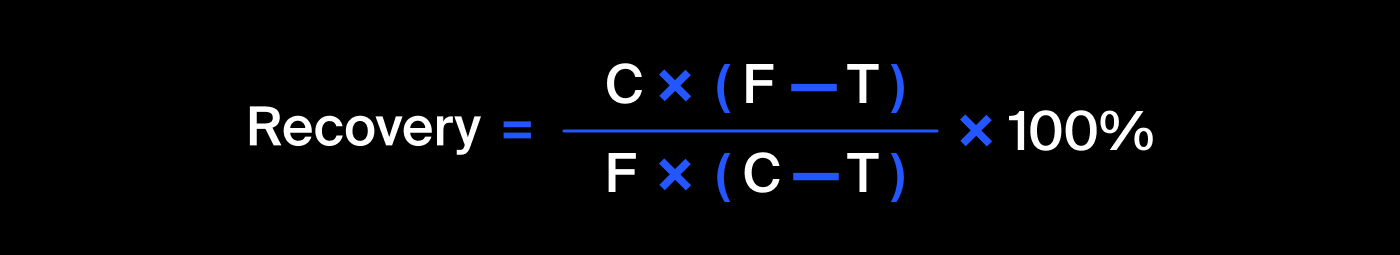

In [ ]:
train.columns

Можно выделить два признака целевых: эффективность обогащения чернового концентрата rougher.output.recovery;
эффективность обогащения финального концентрата final.output.recovery

In [ ]:
def recovery(train):
  C = train['rougher.output.concentrate_au']
  F = train['rougher.input.feed_au']
  T = train['rougher.output.tail_au']
  recovery = (((C * (F-T))) / (F * (C-T)))*100
  return recovery

In [ ]:
train_recovery = train [['rougher.output.concentrate_au', 'rougher.input.feed_au', 'rougher.output.tail_au', 'rougher.output.recovery']]
train_recovery = train_recovery.dropna(axis=0)
train_recovery['test_recovery'] = train_recovery.apply(recovery, axis=1)
train_recovery.head(3)

In [ ]:
mae = mean_absolute_error(train_recovery['rougher.output.recovery'], train_recovery['test_recovery'])
mae

значение mae 9.73512347450521e-15 можно считать равным нулю значит эффективность обогащения рассчитана правильно

## 1.3. Проанализируем признаки, недоступные в тестовой выборке

В условии задачи сказано: Некоторые параметры недоступны, потому что замеряются значительно позже. Из-за этого в тестовой выборке отсутствуют некоторые признаки, которые могут быть в обучающей.

Найдем столбцы, которые отсуствуют в тестовой выборке

In [ ]:
set_test  = list(set(train.columns) - set(test.columns))
set_test

In [ ]:
len(set(df.columns) - set(test.columns))

Пропущенно 34 признака. Пропущенны значения калькуляции, некоторые выходные данные и два целевых признака. Эти параметры недоступны в test выборке, т.к. их невозможно измерить во время выполнения технологического процесса.


## 1.4. Проведём предобработку данных

In [ ]:
train.describe()

In [ ]:
train[['rougher.output.recovery', 'final.output.recovery']].isna().mean()

Пропусков по целевому признаку нет

In [ ]:
train.isna().mean().sort_values(ascending=False)

In [ ]:
train = train.ffill()
train.isna().mean().sort_values(ascending=False)

In [ ]:
df = df.ffill()
df.isna().mean().sort_values(ascending=False)

In [ ]:
test = test.ffill()
test.isna().mean().sort_values(ascending=False)

In [ ]:
df.isna().mean().sort_values(ascending=False)

Удалим из обучающей выборки колонки, которых нет в тестовой выборке, кроме целевых признаков. А в текстовую выборку добавим целевые признаки.

In [ ]:
full_df_merged = df[['rougher.output.recovery', 'final.output.recovery']]
test = test.merge(full_df_merged, on='date', how='left')

# 2. Исследовательский анализ данных

## 2.1. Посмотрим, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки

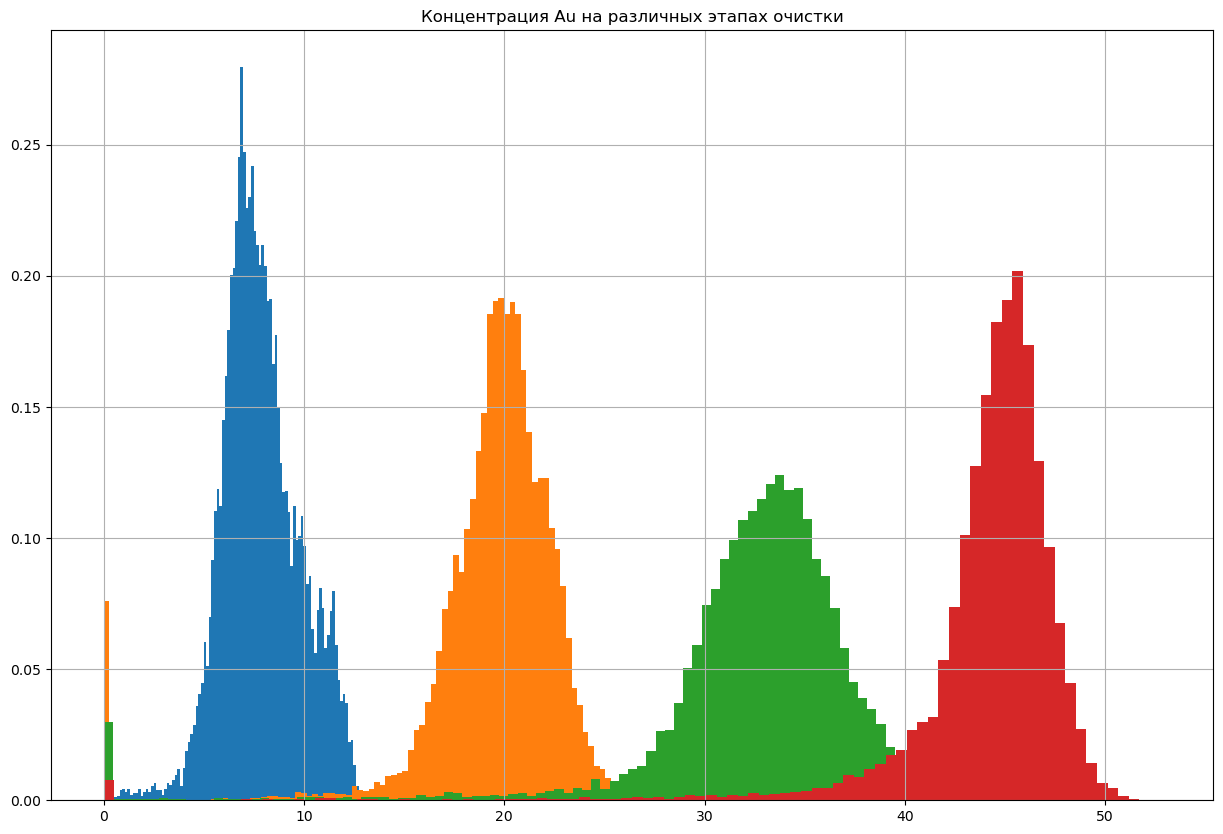

In [ ]:
plt.title('Концентрация Au на различных этапах очистки')
train['rougher.input.feed_au' ].hist(density=True, bins=100, figsize=(15,10))
train['rougher.output.concentrate_au'].hist(density=True, bins=100, figsize=(15,10))
train['primary_cleaner.output.concentrate_au'].hist(density=True, bins=100, figsize=(15,10))
train['final.output.concentrate_au'].hist(density=True, bins=100, figsize=(15,10))
plt.show()

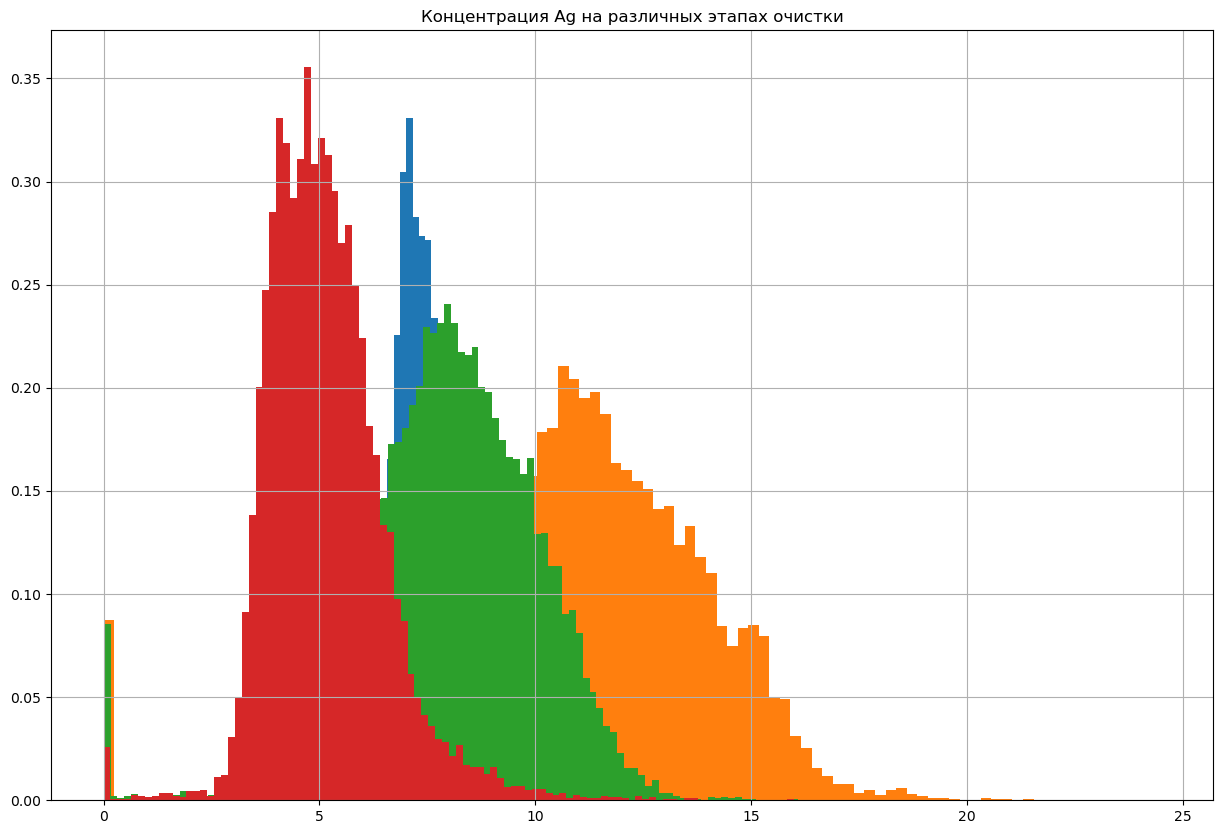

In [ ]:
plt.title('Концентрация Ag на различных этапах очистки')
train['rougher.input.feed_ag' ].hist(density=True, bins=100, figsize=(15,10))
train['rougher.output.concentrate_ag'].hist(density=True, bins=100, figsize=(15,10)),
train['primary_cleaner.output.concentrate_ag'].hist(density=True, bins=100, figsize=(15,10))
train['final.output.concentrate_ag'].hist(density=True, bins=100, figsize=(15,10))
plt.show()

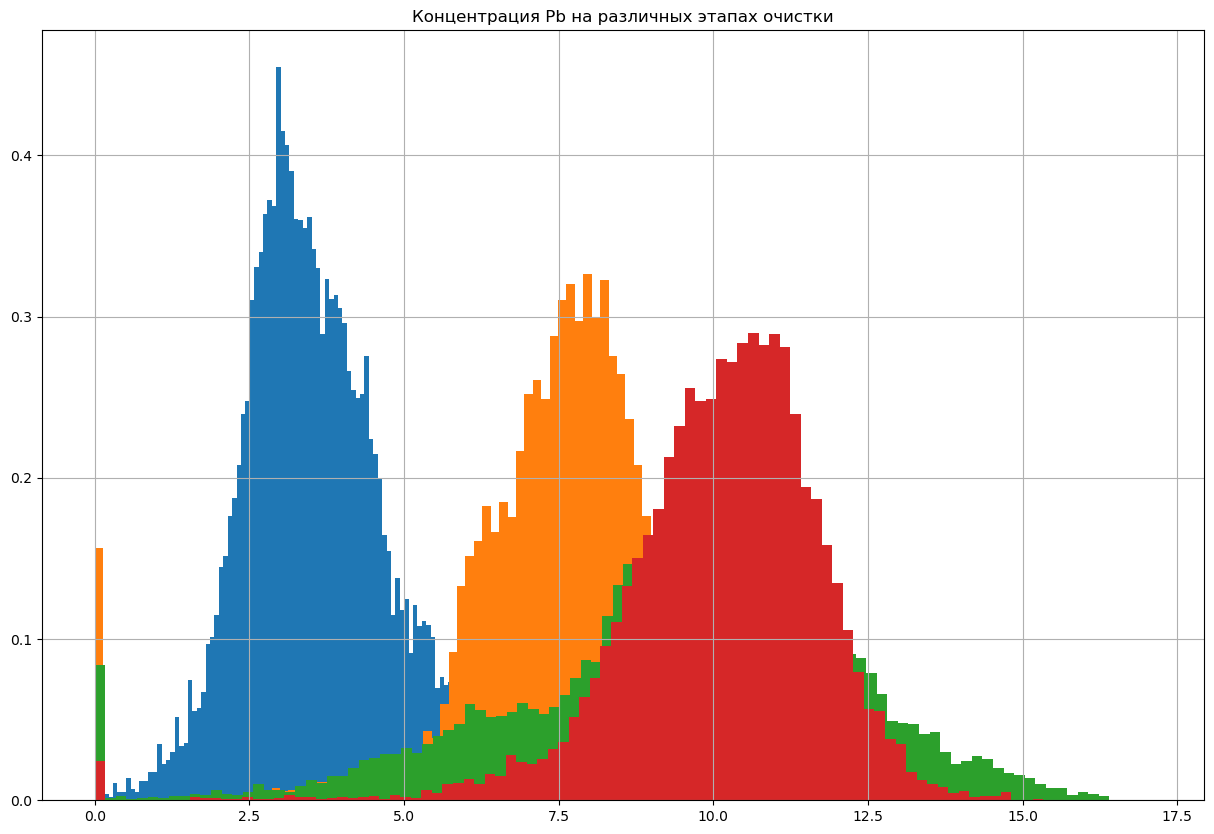

In [ ]:
plt.title('Концентрация Pb на различных этапах очистки')
train['rougher.input.feed_pb' ].hist(density=True, bins=100, figsize=(15,10))
train['rougher.output.concentrate_pb'].hist(density=True, bins=100, figsize=(15,10))
train['primary_cleaner.output.concentrate_pb'].hist(density=True, bins=100, figsize=(15,10))
train['final.output.concentrate_pb'].hist(density=True, bins=100, figsize=(15,10))
plt.show()

Концентация  золота достигиает своих максимальных значений в конце технологического процесса.

Концентрация серебра повышается по завершению этапа флотации и по мере очистики начианет снижаться

Концентрация свинца уменьшаеться и выходит на один уровень в конце технологического цикла

Замечены нулевые значения концентраций. Эти значения неинформативны а для обучения модели они могут помешать их надо будет удалить

## 2.2.  Сравним распределения размеров гранул сырья на обучающей и тестовой выборках

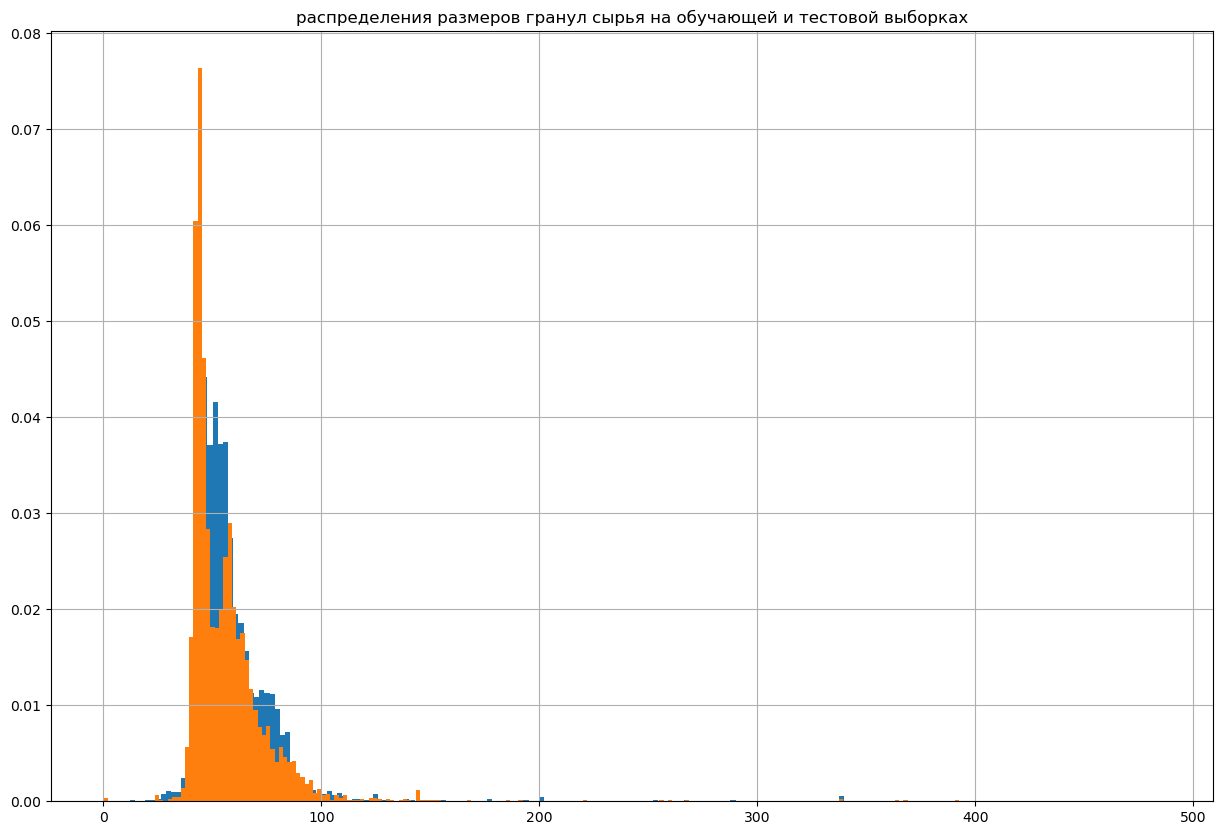

In [ ]:
plt.title('распределения размеров гранул сырья на обучающей и тестовой выборках')
train['rougher.input.feed_size' ].hist(density=True, bins=200, figsize=(15,10))
test['rougher.input.feed_size'].hist(density=True, bins=200, figsize=(15,10))
plt.show()

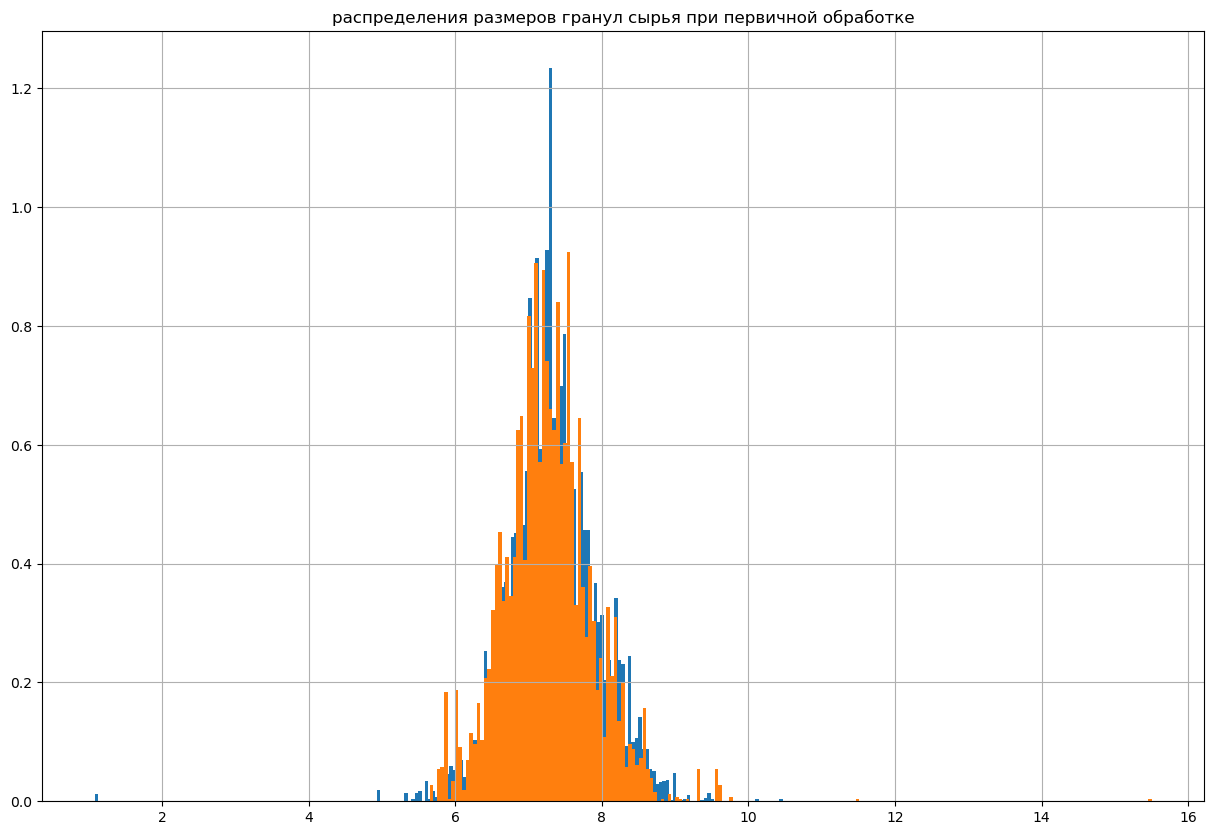

In [ ]:
plt.title('распределения размеров гранул сырья при первичной обработке')
train['primary_cleaner.input.feed_size' ].hist(density=True, bins=200, figsize=(15,10))
test['primary_cleaner.input.feed_size'].hist(density=True, bins=200, figsize=(15,10))
plt.show()

Распределения на тестовой и обучающей выборках схожи, различия между ними не значительны. Предположим что это не помешает в дальнейших расчетах

## 2.3. Исследуем суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах

In [ ]:
crude = 'rougher.input.feed_'
crude_out = 'rougher.output.concentrate_'
prim_clean = 'primary_cleaner.output.concentrate_'
final = 'final.output.concentrate_'

df['сырье'] = df[[crude+'au', crude+'ag', crude+'pb']].sum(axis=1)
df['черновой концентрат'] = df[[crude_out+'au', crude_out+'ag', crude_out+'pb']].sum(axis=1)
df['концентрат после очистки'] = df[[prim_clean+'au', prim_clean+'ag', prim_clean+'pb']].sum(axis=1)
df['финальный концентрат'] = df[[final+'au', final+'ag', final+'pb']].sum(axis=1)

In [ ]:
df[['сырье', 'черновой концентрат', 'концентрат после очистки', 'финальный концентрат']].describe()

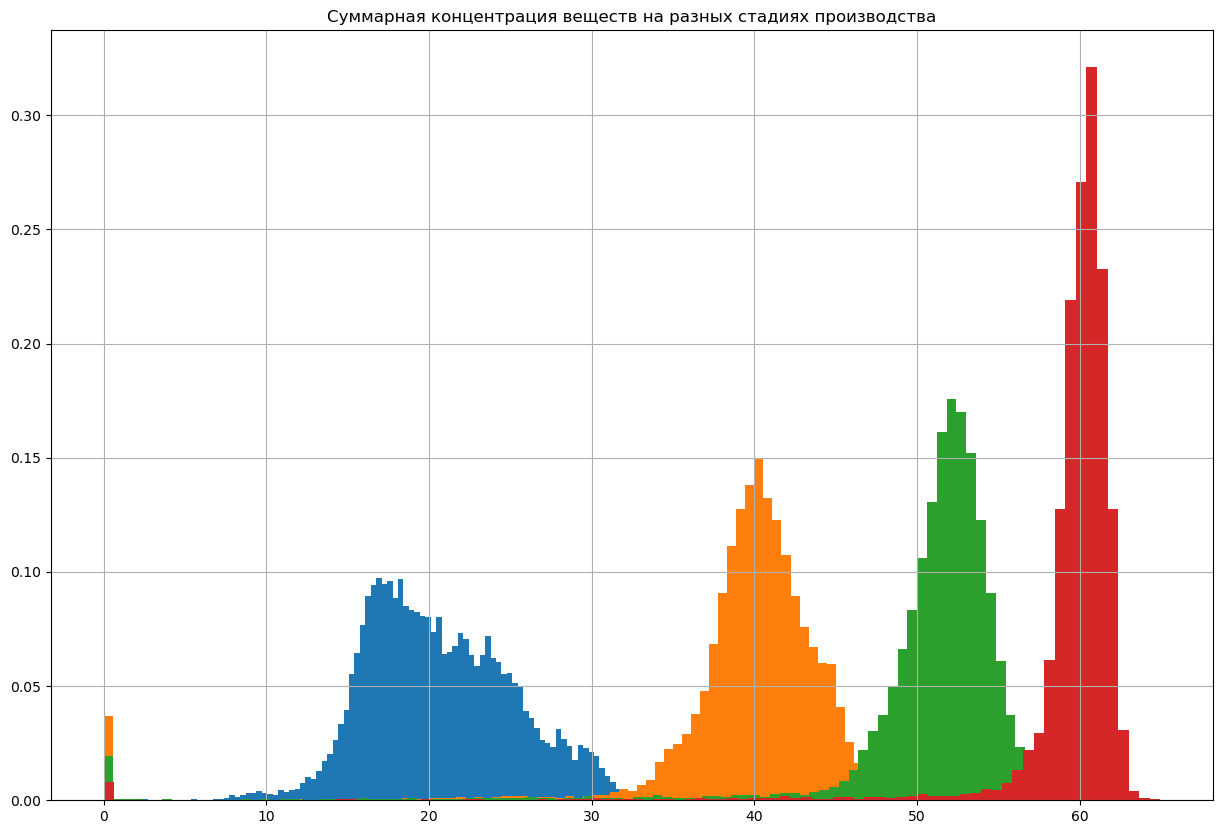

In [ ]:
plt.title('Суммарная концентрация веществ на разных стадиях производства')
df['сырье'].hist(density=True, bins=100, figsize=(15,10))
df['черновой концентрат'].hist(density=True, bins=100, figsize=(15,10))
df['концентрат после очистки'].hist(density=True, bins=100, figsize=(15,10))
df['финальный концентрат'].hist(density=True, bins=100, figsize=(15,10))
plt.show()

Происходит обогащение сырья к финальной стадии технологического процесса.

# 3. Построим и обучим модель

## 3.1. Напишем функцию для вычисления итоговой sMAPE

Удалим нулевые значения увиденные на графиках

In [ ]:
train = train[(train == 0).sum(axis=1) == 0]
test = test[(test == 0).sum(axis=1) == 0]
df = df[(df == 0).sum(axis=1) == 0]

Разобьем выборки

In [ ]:
features_train = train.drop(columns = ["rougher.output.recovery", "final.output.recovery"], axis=1)
target_train = train[["rougher.output.recovery", "final.output.recovery"]]

features_test = test.drop(columns = ["rougher.output.recovery", "final.output.recovery"], axis=1)
target_test = test[["rougher.output.recovery", "final.output.recovery"]]

Удалим столбцы, характеризующие этапы последующей обработки, из обучающей выборки, которые обнаружили ранее.

In [ ]:
features_train = features_train.drop(columns = ['primary_cleaner.output.concentrate_pb',
                                                'final.output.concentrate_ag',
                                                'final.output.tail_au',
                                                'rougher.output.tail_sol',
                                                'rougher.output.tail_au',
                                                'rougher.output.concentrate_pb',
                                                'final.output.concentrate_au',
                                                'rougher.calculation.floatbank11_sulfate_to_au_feed',
                                                'rougher.output.concentrate_au',
                                                'primary_cleaner.output.concentrate_sol',
                                                'final.output.tail_ag',
                                                'primary_cleaner.output.tail_ag',
                                                'rougher.output.concentrate_ag',
                                                'final.output.tail_sol',
                                                'secondary_cleaner.output.tail_sol',
                                                'rougher.calculation.sulfate_to_au_concentrate',
                                                'final.output.concentrate_pb',
                                                'primary_cleaner.output.tail_au',
                                                'rougher.output.tail_ag',
                                                'final.output.concentrate_sol',
                                                'rougher.output.tail_pb',
                                                'rougher.calculation.au_pb_ratio',
                                                'primary_cleaner.output.concentrate_ag',
                                                'final.output.tail_pb',
                                                'rougher.calculation.floatbank10_sulfate_to_au_feed',
                                                'primary_cleaner.output.concentrate_au',
                                                'secondary_cleaner.output.tail_au',
                                                'primary_cleaner.output.tail_sol',
                                                'rougher.output.concentrate_sol',
                                                'secondary_cleaner.output.tail_ag',
                                                'secondary_cleaner.output.tail_pb',
                                                'primary_cleaner.output.tail_pb'], axis = 1)

In [ ]:
display(features_train.shape)
display(target_train.shape)
display(features_test.shape)
display(target_test.shape)

данные для модели подготовлены

Для решения задачи введём новую метрику качества — sMAPE (англ. Symmetric Mean Absolute Percentage Error, «симметричное среднее абсолютное процентное отклонение»).
Она похожа на MAE, но выражается не в абсолютных величинах, а в относительных

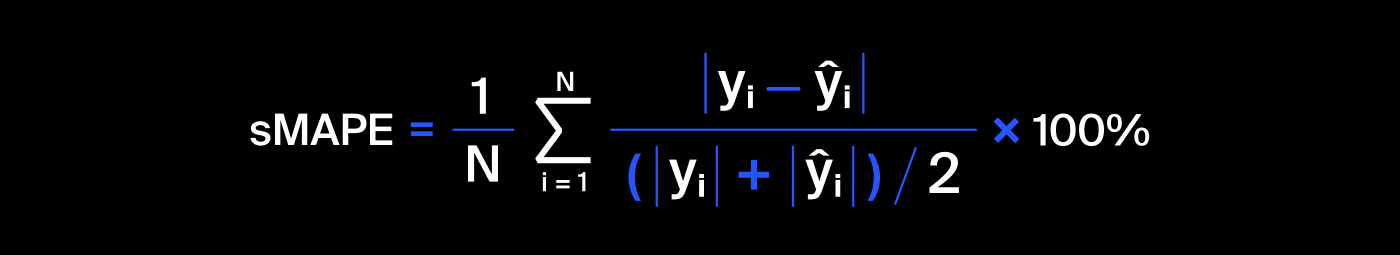

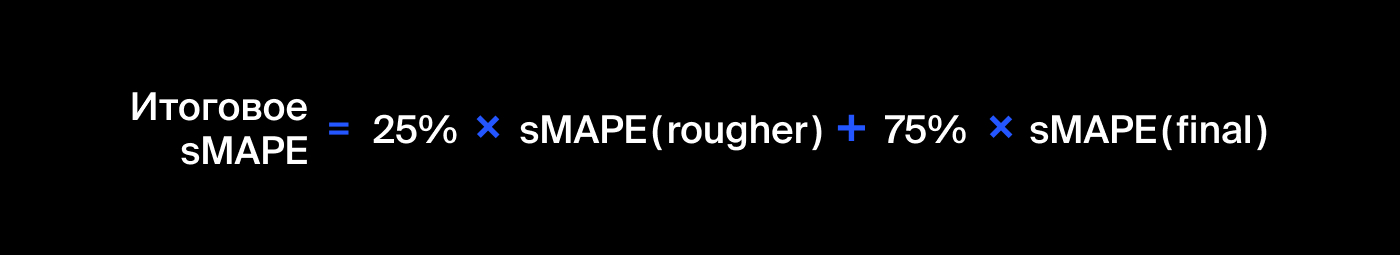

In [ ]:
def smape(target_now, target_pred):
    dividend = np.abs(target_now - target_pred)
    divider = (np.abs(target_now) + np.abs(target_pred)) / 2
    return 1 / len(target_now) * np.sum(dividend / divider) * 100

def final_smape(target_now, target_pred):
    target_now_rougher = target_now['rougher.output.recovery']
    target_now_final = target_now['final.output.recovery']
    target_pred_rougher = target_pred[:, 0]
    target_pred_final = target_pred[:, 1]
    return 0.25 * smape(target_now_rougher, target_pred_rougher) + 0.75 * smape(target_now_rougher, target_pred_rougher)

smape_scorer = make_scorer(final_smape, greater_is_better=False)

## 3.2. Обучим разные модели и оценим их качество кросс-валидацией

In [ ]:
%%time
# Логистическая регрессия
# Создадим параметры grid для модели LinearRegression
param_grid_lg = {'normalize': [False, True]}
# Создадим модель
lg = LinearRegression()

grid_search_lg = GridSearchCV(estimator=lg, param_grid=param_grid_lg,
                              scoring=smape_scorer, cv=5, n_jobs=-1)
grid_search_lg.fit(features_train, target_train)

dummy_regr = DummyRegressor(strategy="median")
dummy_regr.fit(target_train, features_train)
DummyRegressor()
dummy_regr.predict(target_train)

final_score = cross_val_score(dummy_regr, features_train, target_train,scoring=smape_scorer, cv=5)
scores = final_score
final_score = scores.sum()/len(scores)

print('Сравненние модели с константной моделью кросс-валидацией:', final_score)
print("Лучшее значение sMAPE для LinearRegression:", -grid_search_lg.best_score_.round(4),
      "\nПараметры модели:", grid_search_lg.best_params_)

In [ ]:
%%time
# Дерево решений
# Создадим параметры grid для модели DecisionTreeRegressor
param_grid_dt = {'max_depth': range(2, 8)}
# Создадим модель
dt = DecisionTreeRegressor(random_state=42)

grid_search_dt = GridSearchCV(estimator=dt, param_grid=param_grid_dt, scoring=smape_scorer, cv=5, n_jobs=-1)

grid_search_dt.fit(features_train, target_train)

dummy_regr = DummyRegressor(strategy="median")
dummy_regr.fit(target_train, features_train)
DummyRegressor()
dummy_regr.predict(target_train)

final_score = cross_val_score(dummy_regr, features_train, target_train,scoring=smape_scorer, cv=5)
scores = final_score
final_score = scores.sum()/len(scores)

print('Сравненние модели с константной моделью кросс-валидацией:', final_score)
print("Лучшее значение sMAPE для DecisionTreeRegressor:", -grid_search_dt.best_score_.round(4),
      "\nЛучшая модель:", grid_search_dt.best_params_)

In [ ]:
%%time
# Случайный лес
# Создадим параметры grid для модели RandomForestRegressor
param_grid_rf = {
    'max_depth': (1, 3, 5, 16),
    'n_estimators': range(100, 121, 10)
}
# Создадим модель
rf = RandomForestRegressor(random_state=42)

grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf,
                              scoring=smape_scorer, cv=5, n_jobs=-1, verbose=2)

grid_search_rf.fit(features_train, target_train)

dummy_regr = DummyRegressor(strategy="median")
dummy_regr.fit(target_train, features_train)
DummyRegressor()
dummy_regr.predict(target_train)

final_score = cross_val_score(dummy_regr, features_train, target_train,scoring=smape_scorer, cv=5)
scores = final_score
final_score = scores.sum()/len(scores)

print('Сравненние модели с константной моделью кросс-валидацией:', final_score)
print("Лучшее значение sMAPE для RandomForestRegressor:", -grid_search_rf.best_score_.round(4),
      "\nЛучшая модель:", grid_search_rf.best_params_)

Лучшие значения показала модель RandomForestRegressor, c параметрами 'max_depth': 5, 'n_estimators': 110, теперь проверим модель на тесте

In [ ]:
%%time
rf = RandomForestRegressor(random_state=42, max_depth=5, n_estimators=110)
rf.fit(features_train, target_train)
predicted_test = rf.predict(features_test)
print('sMAPE RandomForestRegressor на тестовой выборке:', final_smape(target_test, predicted_test))

# 4 Вывод

  Была поставлена задача, подготовить прототип модели машинного обучения.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. В результате проведенного исследования, выяснили что предоставленный тестовый сет отличается по содержанию от обучающего. Было принято решение проводить обучение только по признакам, схожих в обоих сетах данных.

В процессе исследования выяснили, что в сетах присутствуют аномалии - нулевые значения концентраций веществ, что вероятнее всего - ошибка.
  
  Лучший результат по метрике sMAPE показала модель RandomForestRegressor, c параметрами 'max_depth': 5, 'n_estimators': 110 считаю для данного задания это лучшая модель.